In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
from sklearn.model_selection import train_test_split

In [16]:
# importing the data
train = pd.read_csv('train.tsv', sep='\t')
test = pd.read_csv('test.tsv', sep='\t')

train.columns

Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment'], dtype='object')

In [17]:
print("=============== Train Dataset ===============")
print("Number of Pharses: ", len(train))
print("Number of Unique sentences: ", len(set(train['SentenceId'])))
print("=============== Test Dataset ===============")
print("Number of Pharses: ", len(test))
print("Number of Unique sentences: ", len(set(test['SentenceId'])))

=============== Train Dataset ===============
Number of Pharses:  156060
Number of Unique sentences:  8529
=============== Test Dataset ===============
Number of Pharses:  66292
Number of Unique sentences:  3310


### Visualising the distribution of data across labels

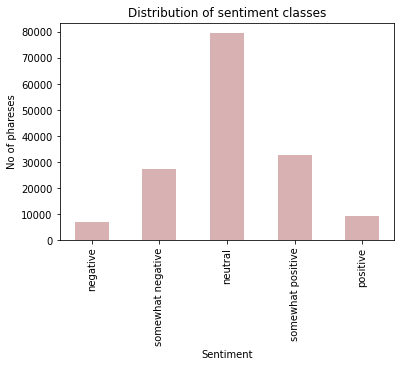

In [18]:
class_dist_df = train['Sentiment'].value_counts().reset_index()
class_dist_df = class_dist_df.sort_values(by='index')
class_dist_df['sentiment_name'] = ['negative',
                                   'somewhat negative', 
                                   'neutral',
                                   'somewhat positive',
                                   'positive']
class_dist_df
plt.bar(class_dist_df['sentiment_name'], class_dist_df['Sentiment'], 
        color ='maroon',
        align='center',
        width = 0.5,
       alpha=0.3)
plt.xticks(rotation = 90) 
#plt.figure(figsize=(5,5))
plt.xlabel("Sentiment")
plt.ylabel("No of phareses")
plt.title("Distribution of sentiment classes")
plt.show()

### Visualising the word cloud for each class 
- This hels validate the expected behaviour/words for each class. 

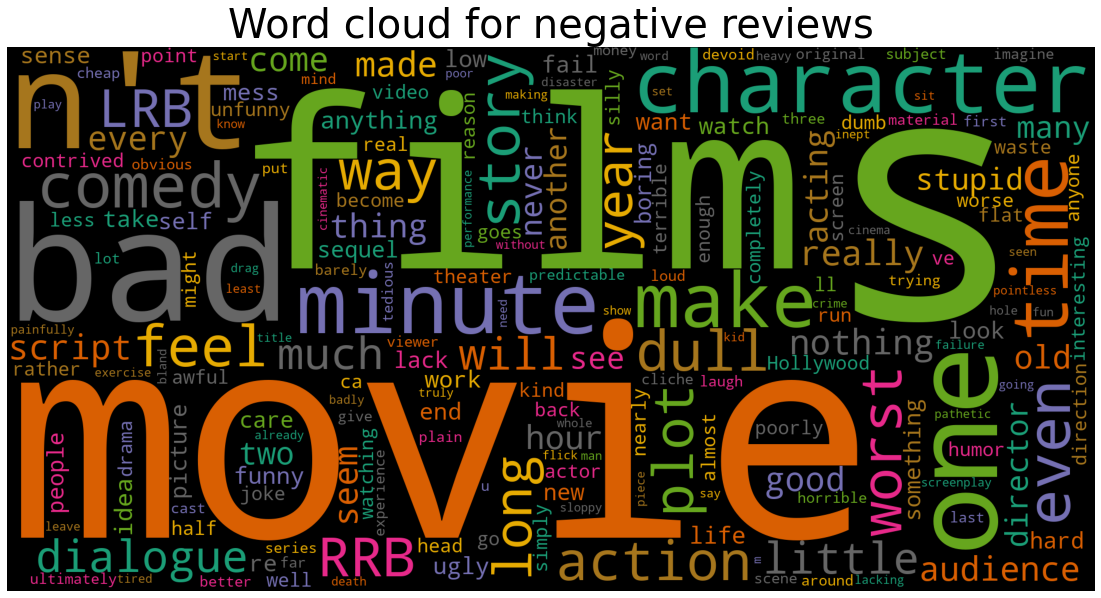

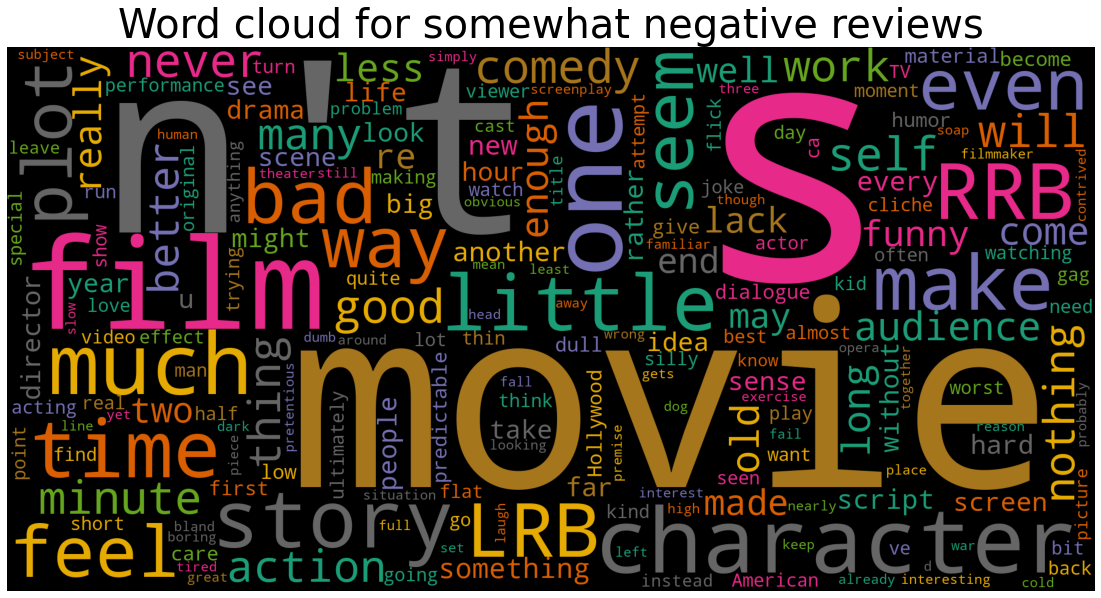

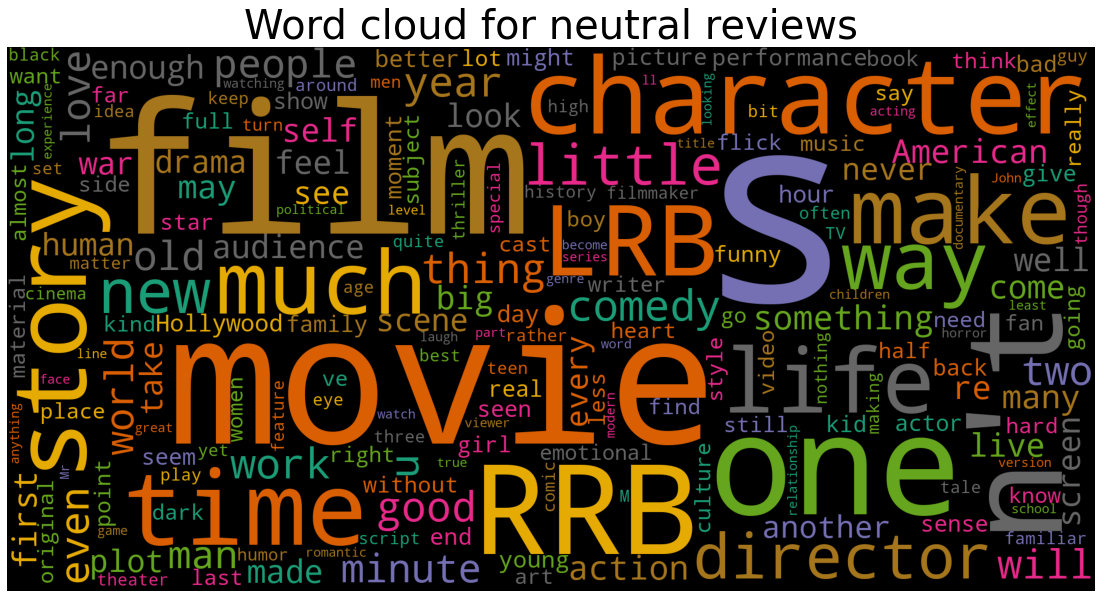

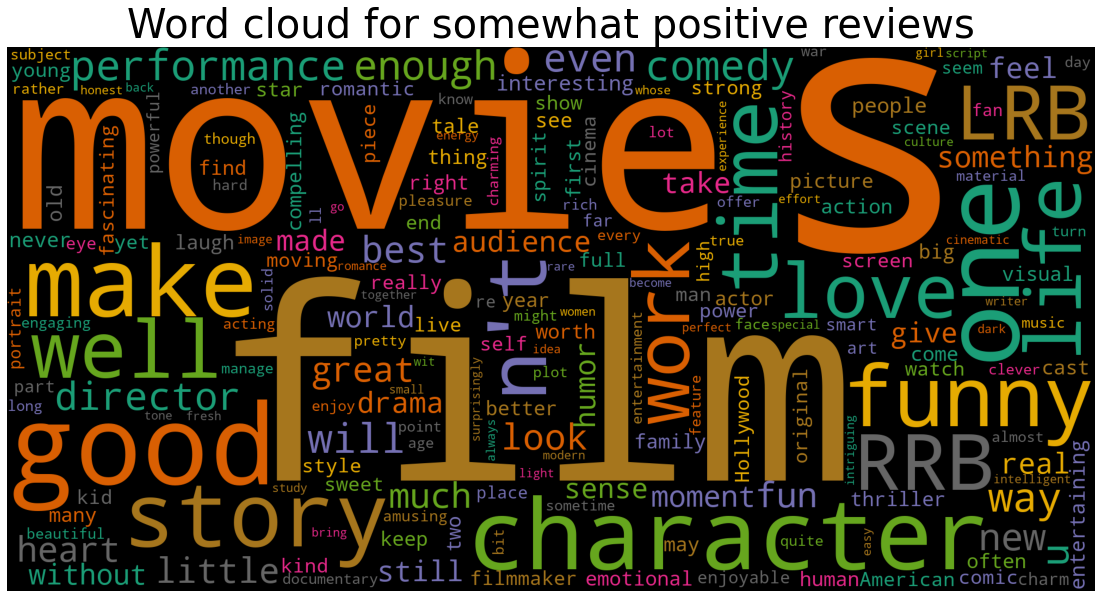

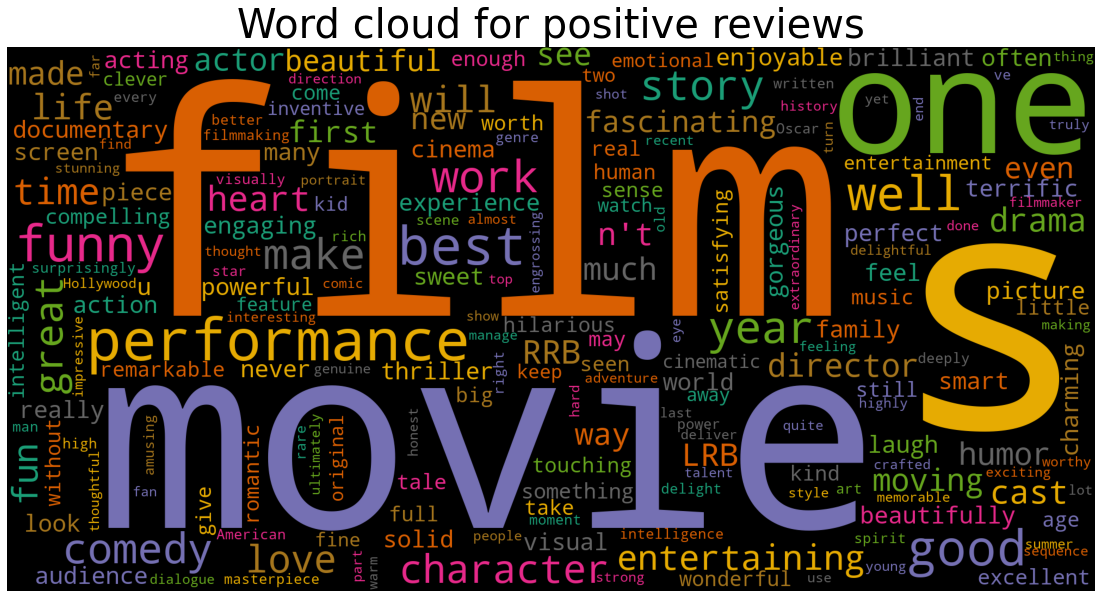

In [20]:
for index, row in class_dist_df.iterrows():
    plt.figure(figsize=(20,10))
    subset = train[train['Sentiment']==row['index']]
    text_sentiment = subset.Phrase.values
    cloud2=WordCloud(background_color='black',
                     colormap="Dark2",
                     collocations=False,
                     width=2000,height=1000).generate(" ".join(text_sentiment))

    plt.axis('off')
    plt.title('Word cloud for '+row['sentiment_name']+" reviews",fontsize=40)
    plt.imshow(cloud2)
    

### Distribution of phrase length for each class

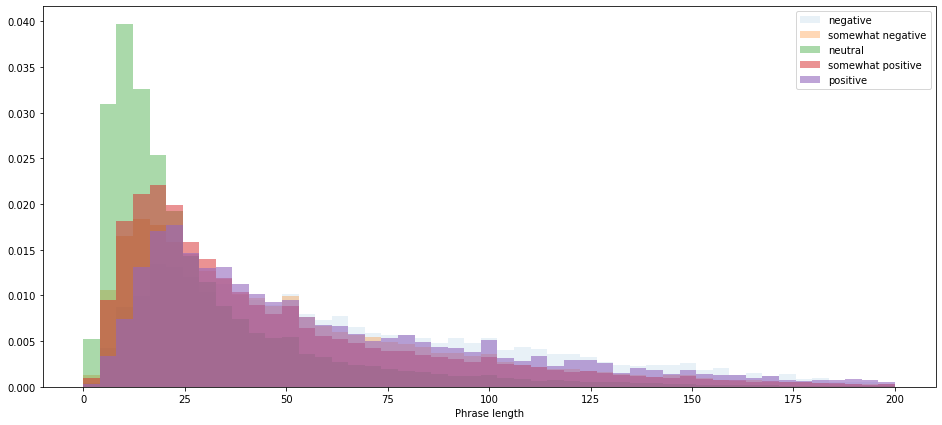

In [39]:
train = pd.read_csv('train.tsv', sep='\t')
train['PhraseLength']=train['Phrase'].apply(lambda x: len(x))
map_sentiment = {0: 'negative',
                 1: 'somewhat negative', 
                 2: 'neutral',
                 3: 'somewhat positive',
                 4: 'positive'}

train["sentiment_class"] = train['Sentiment'].map(map_sentiment)

#Distribution of phrase length on each class
plt.figure(figsize=(16,7))
bins=np.linspace(0,200,50)
plt.hist(train[train['sentiment_class']=='negative']['PhraseLength'],
         bins=bins,density=True,label='negative', alpha=0.1)
plt.hist(train[train['sentiment_class']=='somewhat negative']['PhraseLength'],
         bins=bins,density=True,label='somewhat negative', alpha=0.3)
plt.hist(train[train['sentiment_class']=='neutral']['PhraseLength'],
         bins=bins,density=True,label='neutral', alpha=0.4)
plt.hist(train[train['sentiment_class']=='somewhat positive']['PhraseLength'],
         bins=bins,density=True,label='somewhat positive', alpha=0.5)
plt.hist(train[train['sentiment_class']=='positive']['PhraseLength'],
         bins=bins,density=True,label='positive', alpha=0.6)
plt.xlabel('Phrase length')
plt.legend()
plt.show()


By looking at the distribution of the phrase lengths across the classes it can be seen that all the classes have majority of the phases with the of length in the range of around 10 to 25 characters.
